### Student Information
Name: 陳羿先

Student ID: 108062506

GitHub ID: s38565

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here

## Part 1

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [3]:
# select some columns(by name)
X.loc[0:10, 'text':'category_name']

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [4]:
# show directly some datas by calling index
X.loc[[0,4,22,122,333],:]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
22,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
122,From: lpzsml@unicorn.nott.ac.uk (Steve Lang) S...,0,alt.atheism
333,From: wlm@wisdom.attmail.com (Bill Myers) Subj...,1,comp.graphics


In [5]:
# iloc
X.iloc[1:5,0:2]

,text,category
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3


In [6]:
# random one data out
X.sample()

,text,category,category_name
1310,From: brenner@ldgo.columbia.edu (carl brenner)...,2,sci.med


### ** >>> Exercise 5 (take home):** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [7]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [8]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#### Answer here
{ 'id': 'A', 'missing_example': np.nan } -> T
-> pandas' definition of NaN is "np.nan", so isnull() works well.

{ 'id': 'B'                    } -> T
-> empty definition will return empty which means NaN, so isnull() works well.

{ 'id': 'C', 'missing_example': 'NaN'  } -> F
-> 'NaN' will be treated as a string with contents 'NaN', so isnull() can't work.

{ 'id': 'D', 'missing_example': 'None' } -> F
-> 'None' will be treated as a string with contents 'None', so isnull() can't work.

{ 'id': 'E', 'missing_example':  None  } -> T
-> None without '' will be treated as special identifier which really means nothing, 
so isnull() works well.

{ 'id': 'F', 'missing_example': ''     } -> F
-> '' will be treated as an empty string, but it contains contents "empty", so isnull() can't work.

### ** >>> Exercise 6 (take home):** 
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [9]:
# choose 1000 samples
X_sample = X.sample(n=1000)

In [10]:
len(X)

2257

In [11]:
len(X_sample)

1000

In [12]:
X[-10:]

,text,category,category_name
2247,From: daniels@math.ufl.edu (TV's Big Dealer) S...,3,soc.religion.christian
2248,"From: ""danny hawrysio"" <danny.hawrysio@canrem....",1,comp.graphics
2249,From: shellgate!llo@uu4.psi.com (Larry L. Over...,3,soc.religion.christian
2250,From: ingles@engin.umich.edu (Ray Ingles) Subj...,0,alt.atheism
2251,From: Mark-Tarbell@suite.com Subject: Amniocen...,2,sci.med
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med
2256,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med


In [13]:
X_sample[-10:]

,text,category,category_name
789,From: davem@bnr.ca (Dave Mielke) Subject: Does...,3,soc.religion.christian
1421,From: aron@tikal.ced.berkeley.edu (Aron Bonar)...,1,comp.graphics
1027,From: csc3phx@vaxa.hofstra.edu Subject: Loosin...,1,comp.graphics
1861,From: kmr4@po.CWRU.edu (Keith M. Ryan) Subject...,0,alt.atheism
1905,From: Bjorn.B.Larsen@delab.sintef.no (Bjorn B....,3,soc.religion.christian
2074,From: madler@cco.caltech.edu (Mark Adler) Subj...,1,comp.graphics
110,From: news@cbnewsk.att.com Subject: Re: An agn...,3,soc.religion.christian
2125,From: JBF101@psuvm.psu.edu Subject: same-sex m...,3,soc.religion.christian
2245,From: nyeda@cnsvax.uwec.edu (David Nye) Subjec...,2,sci.med
1258,Subject: prozac From: agilmet@eis.calstate.edu...,2,sci.med


#### Answer here


In [14]:
## The structure of X and X_sample are the same. 
## The movement of sampling dataframe only generates a random subset from X, 
## but do nothing on their contents. Their only difference is length(1000 vs 2257).

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

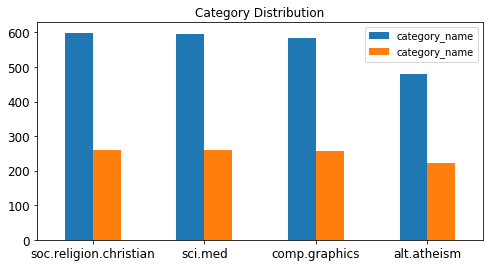

In [15]:
# answer
import matplotlib.pyplot as plt
%matplotlib inline

X_sample = X.sample(n=1000)

# compare each category of X and X_sample
df = pd.DataFrame(np.array([[X.category_name.value_counts()[0],X_sample.category_name.value_counts()[0]],
                            [X.category_name.value_counts()[1],X_sample.category_name.value_counts()[1]],
                            [X.category_name.value_counts()[2],X_sample.category_name.value_counts()[2]],
                            [X.category_name.value_counts()[3],X_sample.category_name.value_counts()[3]]]),
                            columns=['category_name','category_name'],
                            index = X.category_name.value_counts().index)
# ploting
df.plot(kind='bar', title = "Category Distribution", rot = 0, fontsize = 12, figsize = (8,4))

### **>>> Exercise 10 (take home):**
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [16]:
import nltk
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

from sklearn.feature_extraction.text import CountVectorizer

# transorfmed the articles into a term-document matrix
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()


In [17]:
# arg(): Returns the indices that would sort an array
# [::-1] : inverse array
finding = X_counts[5, 0:100].toarray()[0].argsort()[::-1][1]

In [18]:
count_vect.get_feature_names()[finding]

'00pm'

### **>>> Exercise 11 (take home):**
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [19]:
import seaborn as sns
# sorting from large to small and choose ranking #10-30 terms
words = np.argsort(np.sum(X_counts, axis=0).tolist()[0])[::-1][10:30]
# first twenty features only
plot_x = ["term_" + str(count_vect.get_feature_names()[i]) for i in words]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, words].toarray()

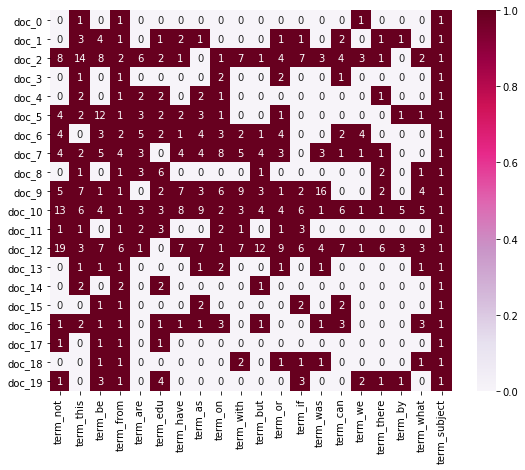

In [20]:
# Answer here
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 12 (take home):**
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

𝐻𝑖𝑛𝑡: you can refer to Axes3D in the documentation.

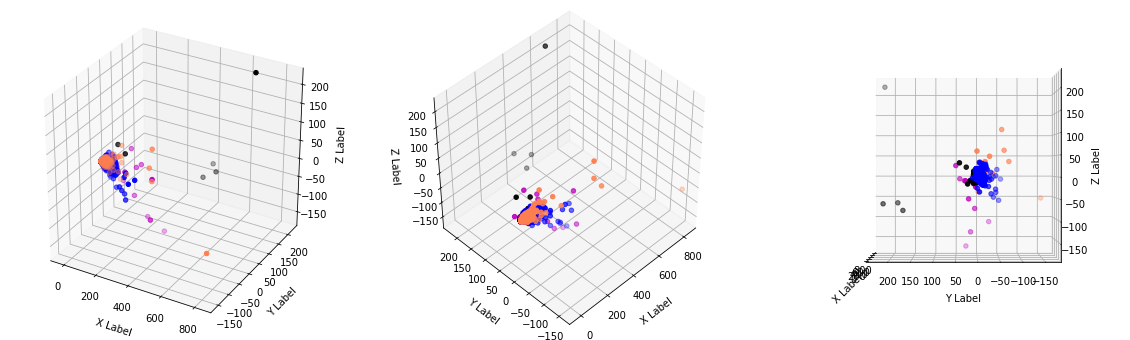

In [21]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d.axes3d import Axes3D

# Number of components to keep
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

## view1
fig1 = plt.figure(figsize=(20, 6))
# 3 subplots
ax1 = fig1.add_subplot(131, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2] #3D
    ax1.scatter(xs, ys, zs, c = c, marker='o')
    
ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label') # add label z

## view2
ax2 = fig1.add_subplot(132, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax2.scatter(xs, ys, zs, c = c, marker='o')

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')

# change view point
ax2.view_init(45, -135)

## view3
ax3 = fig1.add_subplot(133, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax3.scatter(xs, ys, zs, c = c, marker='o')

ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nX Label')
ax3.set_ylabel('\nY Label')
ax3.set_zlabel('\nZ Label')
# change view point
ax3.view_init(0, 180)

#### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [22]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
import plotly
import plotly.graph_objs as go
from helpers import text_analysis

plotly.offline.init_notebook_mode(connected=True)
plot_x = ["term_" + str(i) for i in count_vect.get_feature_names()[0:300]]
# counting
plot_y = term_frequencies[:300]

figs = [go.Bar(
            x = plot_x,
            y = plot_y   
            )]
plotly.offline.iplot(figs)

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [23]:
# Answer here

# Returns the indices that would sort an array
# [0:0:-1] : inverse
indexs = np.argsort(np.sum(X_counts, axis=0).tolist()[0])[::-1][:100]
my_plot = [np.array(count_vect.get_feature_names())[indexs], term_frequencies[indexs]]
plotly.offline.iplot(text_analysis.plot_word_frequency(my_plot, 'exercise14'))

/Users/Shelly/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

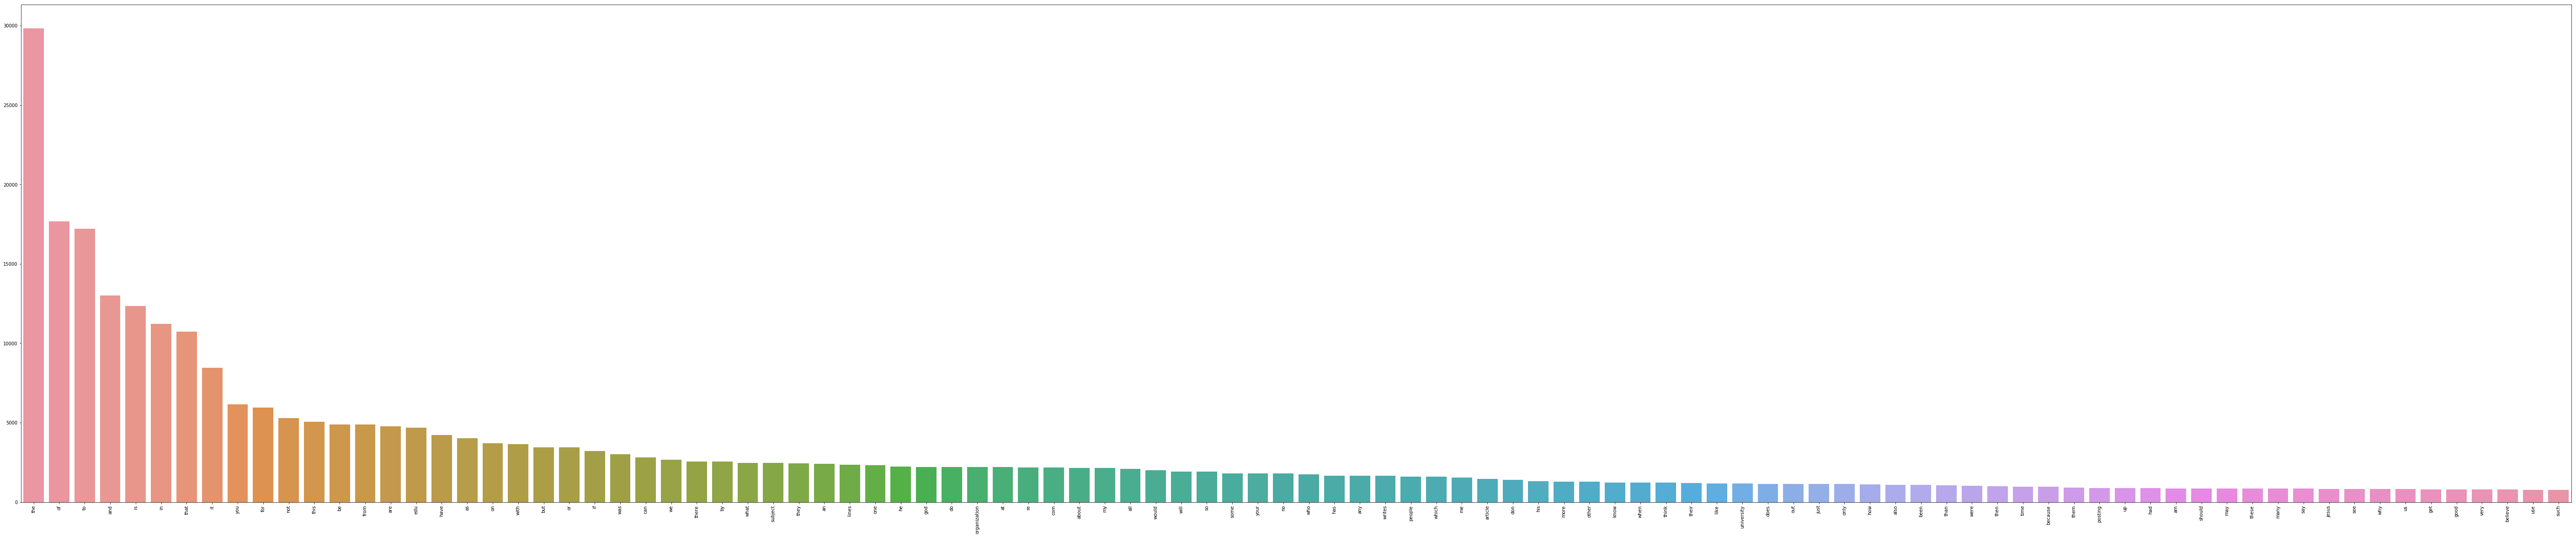

In [24]:
# Answer here

# sorting
indexs = np.argsort(np.sum(X_counts, axis=0).tolist()[0])[::-1][:100]

# define x and y of pics
x_bar = np.array(count_vect.get_feature_names())[indexs]
y_bar = term_frequencies[indexs]
plt.subplots(figsize=(100, 20))

graphs = sns.barplot(x=x_bar, y=y_bar)
graphs.set_xticklabels(x_bar, rotation=90)

plt.show()


### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [25]:
import math
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
# Binarize labels in a one-vs-all fashion
mlb = preprocessing.LabelBinarizer()
# Fit label binarizer
mlb.fit(X.category_name)
# Transform multi-class labels to binary labels
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

# Answer here
# Because it can seperate different category properly, it works I think.
X[0:9]

,text,category,category_name,unigrams,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


## Part 2

### Data Preparation and Transformation

In [26]:
# import related librabry
import plotly.graph_objs as go
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import math
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import plotly
import helpers.data_mining_helpers as dmh
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

%matplotlib inline


In [27]:
# define catogories
categories = ['sentences', 'scores']

# read_csv-> read file
data_amazon = pd.read_csv('sentiment labelled sentences/amazon_cells_labelled.txt', sep = "\t", header = None)
# add columns
data_amazon.columns = categories
# show different sources
data_amazon['source'] = 'amazon'


data_imdb = pd.read_csv('sentiment labelled sentences/imdb_labelled.txt', sep = "\t", header = None)
data_imdb.columns = categories
data_imdb['source'] = 'imdb'

data_yelp = pd.read_csv('sentiment labelled sentences/yelp_labelled.txt', sep = "\t", header = None)
data_yelp.columns = categories
data_yelp['source'] = 'yelp'

# combine all files together
listing = [data_amazon, data_imdb, data_yelp]

# transform into Dataframe structure
my_df = pd.DataFrame(pd.concat(listing))

In [28]:
# show datas now

# format of Dataframe
my_df[2000:2010]

,sentences,scores,source
252,The Greek dressing was very creamy and flavorful.,1,yelp
253,"Overall, I don't think that I would take my pa...",0,yelp
254,Now the pizza itself was good the peanut sauce...,1,yelp
255,We had 7 at our table and the service was pret...,1,yelp
256,Fantastic service here.,1,yelp
257,I as well would've given godfathers zero stars...,0,yelp
258,They know how to make them here.,1,yelp
259,very tough and very short on flavor!,0,yelp
260,I hope this place sticks around.,1,yelp
261,"I have been in more than a few bars in Vegas, ...",0,yelp


In [29]:
# show length of datasets
len(my_df)

2748

In [30]:
## print sentences in datasets
for t in my_df.sentences[:10]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
The mic is great.
I have to jiggle the plug to get it to line up right to get decent volume.
If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.
If you are Razr owner...you must have this!
Needless to say, I wasted my money.
What a waste of money and time!.


In [31]:
# print every 100 records of first ten datas in dataframes with scores=1
my_df[my_df.scores==1][::100][:10]

,sentences,scores,source
1,"Good case, Excellent value.",1,amazon
196,You'll love how thin it is.,1,amazon
384,Magical Help.,1,amazon
578,It does everything the description said it would.,1,amazon
778,This is a great deal.,1,amazon
4,The best scene in the movie was when Gerardo i...,1,imdb
214,Not too screamy not to masculine but just righ...,1,imdb
462,This is a witty and delightful adaptation of t...,1,imdb
621,The characters are fleshed out surprisingly we...,1,imdb
30,"Also there are combos like a burger, fries, an...",1,yelp


#### 1. Missing Values

In [32]:
# use helpers functions to sum up null values
my_df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentences    (The amoung of missing records is: , 0)
scores       (The amoung of missing records is: , 0)
source       (The amoung of missing records is: , 0)
dtype: object

#### 2. Dulplicated

In [33]:
# check dulplicated vals
sum(my_df.duplicated())

17

In [34]:
len(my_df)

2748

In [35]:
# only keep one dulplicates
my_df.drop_duplicates(keep="first", inplace=True)

In [36]:
len(my_df)
# delete 17 duplicated terms

2731

### Data Preprocessing

#### Sampling

In [37]:
# random sampling
df_sample = my_df.sample(n=1000)

In [38]:
# print length of sampling
len(df_sample)

1000

In [39]:
# print value of scores count
print(df_sample['scores'].value_counts())

1    515
0    485
Name: scores, dtype: int64


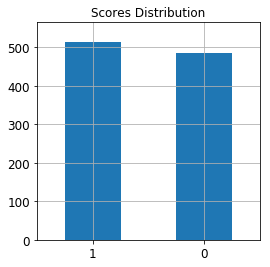

In [40]:
# set upper bounds
upper_bound = max(df_sample['scores'].value_counts()) + 50

# plot barchart for df_sample
df_sample.scores.value_counts().plot(kind = 'bar',
                                     grid = True,
                                     title = 'Scores Distribution',
                                     ylim = [0, upper_bound], 
                                     rot = 0, fontsize = 12, figsize = (4,4))

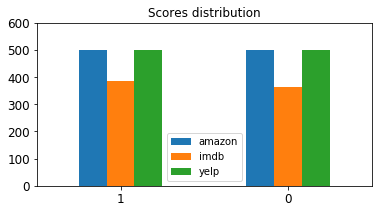

In [41]:
# show bar-charts together to compare
# load datasets and transform into dataframes
list_amazon = [data_amazon]
df_amazon = pd.DataFrame(pd.concat(list_amazon))
list_imdb = [data_imdb]
df_imdb = pd.DataFrame(pd.concat(list_imdb))
list_yelp = [data_yelp]
df_yelp = pd.DataFrame(pd.concat(list_yelp))

# count values
comparison = pd.DataFrame({'amazon':df_amazon['scores'].value_counts(),
                           'imdb':df_imdb['scores'].value_counts(),
                           'yelp':df_yelp['scores'].value_counts()})
# plot
ax = comparison.plot(kind= 'bar',
                     title = 'Scores distribution',
                     ylim = [0, 600],
                     rot = 0,
                     fontsize = 12,
                     figsize = (6,3))

#### Feature Creation

In [42]:
# takes a like a minute or two to process

# use unigrams
my_df['unigrams'] = my_df['sentences'].apply(lambda x: dmh.tokenize_text(x))

In [43]:
# after adding unigrams
my_df[-5:]

,sentences,scores,source,unigrams
995,I think food should have flavor and texture an...,0,yelp,"[I, think, food, should, have, flavor, and, te..."
996,Appetite instantly gone.,0,yelp,"[Appetite, instantly, gone, .]"
997,Overall I was not impressed and would not go b...,0,yelp,"[Overall, I, was, not, impressed, and, would, ..."
998,"The whole experience was underwhelming, and I ...",0,yelp,"[The, whole, experience, was, underwhelming, ,..."
999,"Then, as if I hadn't wasted enough of my life ...",0,yelp,"[Then, ,, as, if, I, had, n't, wasted, enough,..."


#### Feature subset selection

In [44]:
count_vect_my = CountVectorizer()
# Learn the vocabulary dictionary and return term-document matrix
df_counts = count_vect_my.fit_transform(my_df.sentences)
# Return a callable that handles preprocessing and tokenization
analyzed = count_vect_my.build_analyzer()

# set x,y,z
plot_x = ["term_" + str(i) for i in count_vect_my.get_feature_names()[0:70]]
plot_y = ["doc_"+ str(i) for i in list(my_df.index)[0:70]]
plot_z = df_counts[0:70, 0:70].toarray()

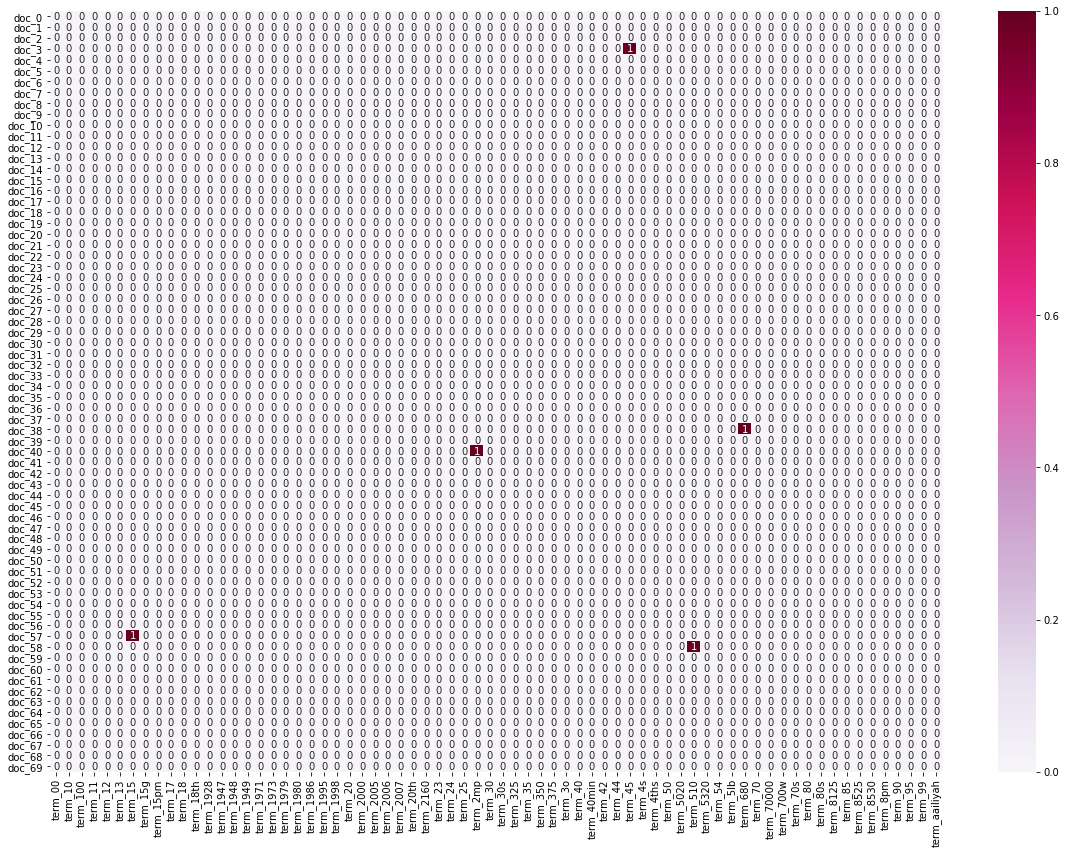

In [45]:
# drawing pics
draws = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 14))
#ploting heatmap
ax1 = sns.heatmap(draws,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### Dimensionality Reduction

In [46]:
# PCA algorithm
# Input: Raw term-vector matrix
# Output: Projections 
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
df_reduced.shape

(2731, 2)

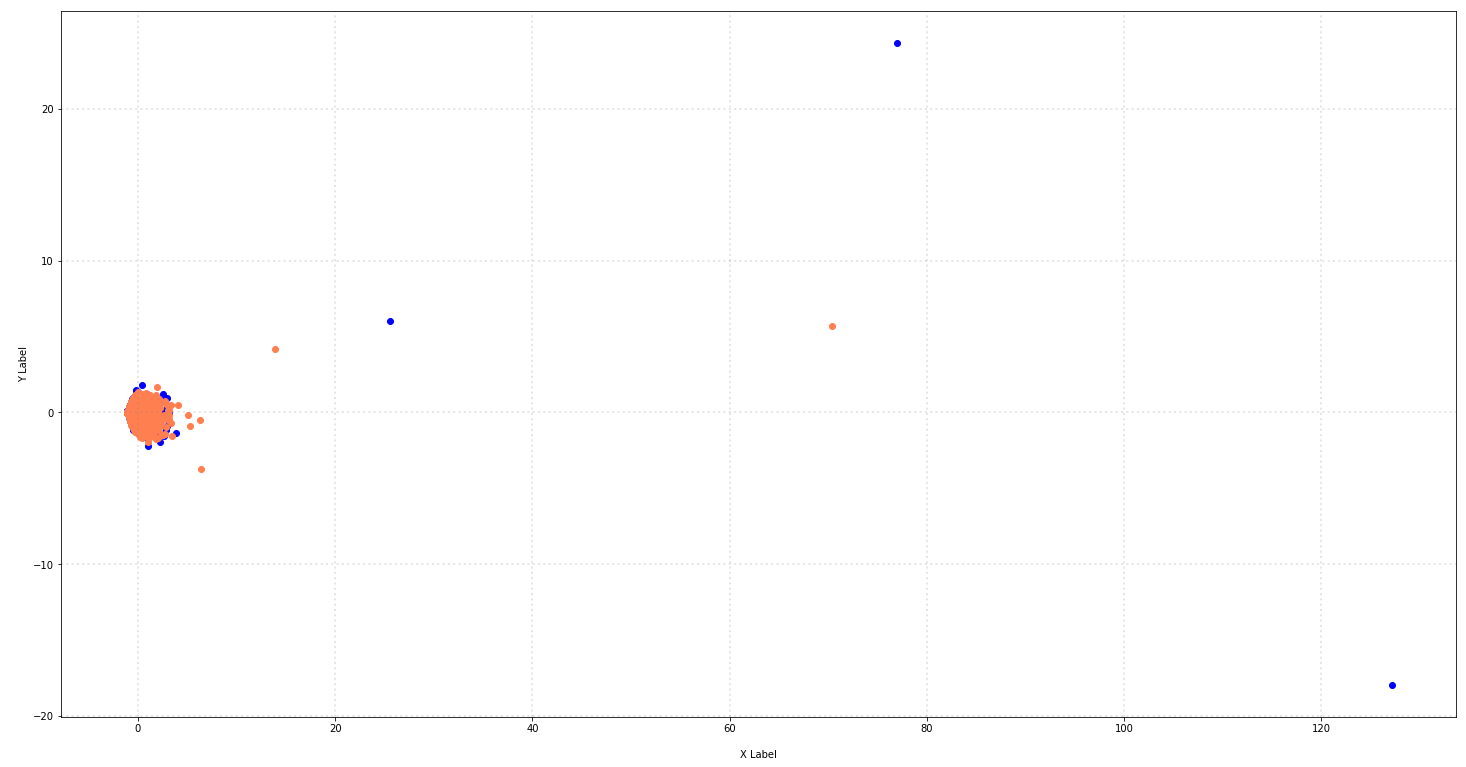

In [47]:
col = ['blue', 'coral']
score = [0, 1]

# plot
fig = plt.figure(figsize = (25,13))
ax2 = fig.subplots()

for c, s in zip(col, score):
    xs_my = df_reduced[my_df['scores'] == s].T[0]
    ys_my = df_reduced[my_df['scores'] == s].T[1]
   
    ax2.scatter(xs_my, ys_my, c = c, marker='o')

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')

plt.show()

#### Atrribute Transformation / Aggregation

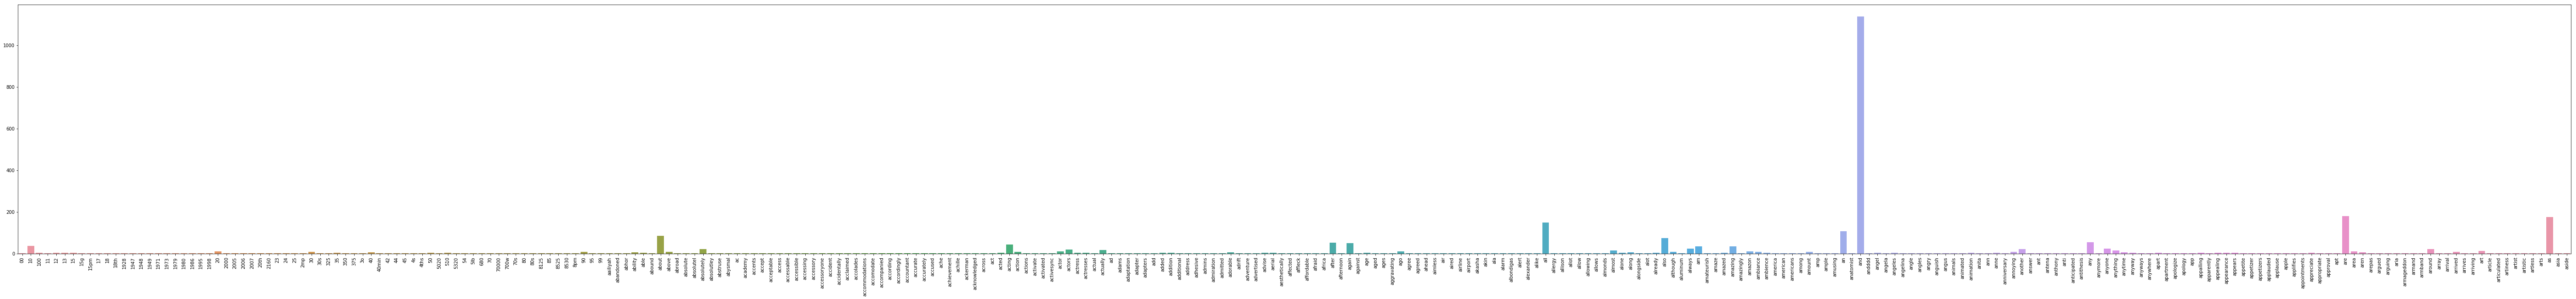

In [48]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
    
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

plt.subplots(figsize=(100, 10))
g1 = sns.barplot(x=count_vect_my.get_feature_names()[:300], 
            y=term_frequencies[:300])
g1.set_xticklabels(count_vect_my.get_feature_names()[:300], rotation = 90);

In [49]:
dataframes = pd.DataFrame({'terms': count_vect_my.get_feature_names()[0:1000], 'counts': term_frequencies[0:1000]})

# sorting by counting
sorted_dataframes = dataframes.sort_values(by = 'counts', ascending = False)

sorted_sample = sorted_dataframes[0:200]

# define x and y terms
x = ["term_" + str(i) for i in sorted_sample['terms']]

y = sorted_sample['counts']

# ploting
pics = [go.Bar(
            x = x,
            y = y   
            )]

plotly.offline.iplot(pics)

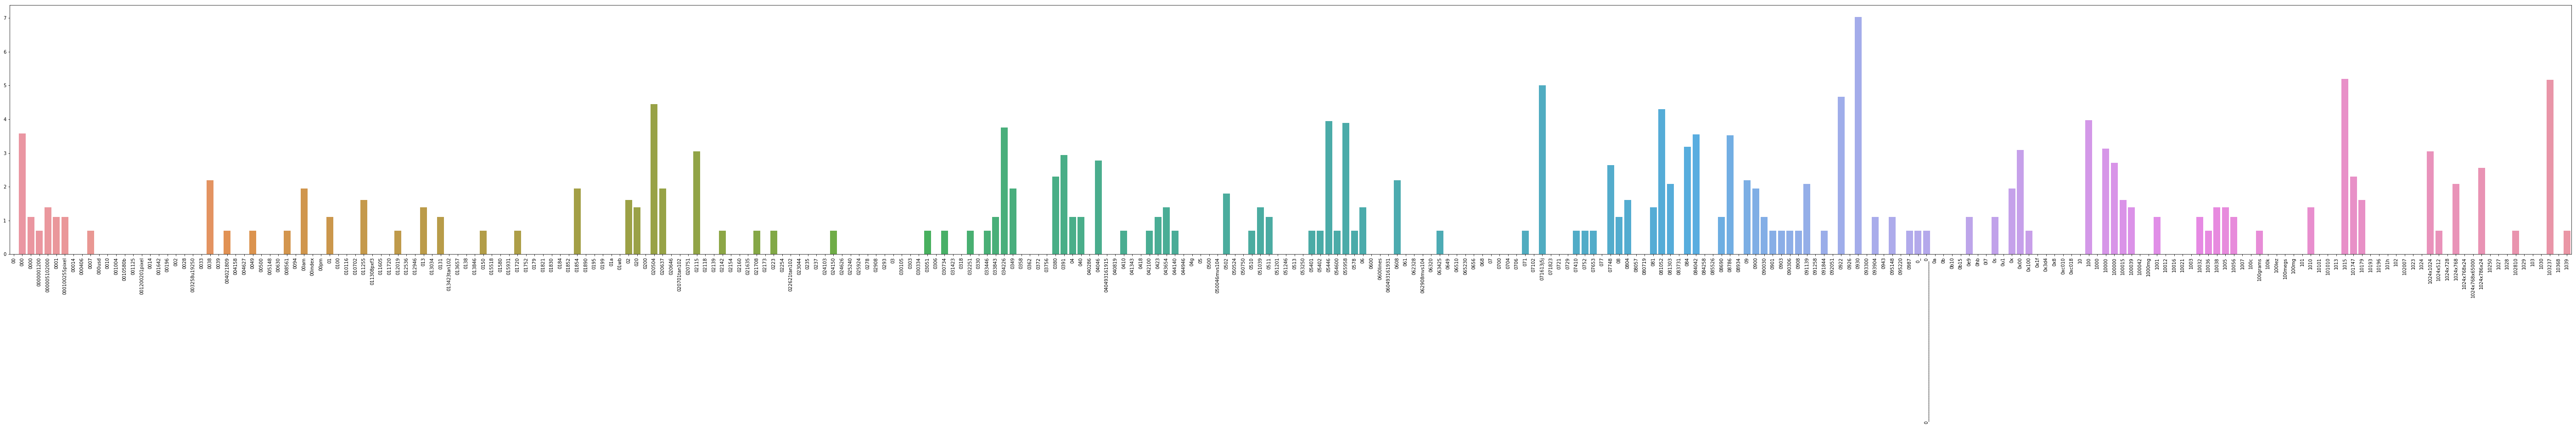

In [50]:
# log term frequencies
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

#### Discretization and Binarization

In [51]:
# Binarize labels in a one-vs-all fashion
mlb = preprocessing.LabelBinarizer()
mlb.fit(my_df.scores)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [52]:
# add binary terms
my_df['bin_scores'] = mlb.transform(my_df['scores']).tolist()

In [53]:
my_df[0:9]

,sentences,scores,source,unigrams,bin_scores
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,amazon,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,amazon,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,amazon,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,amazon,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,amazon,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


### Data Exploration

In [54]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = my_df.iloc[50]
random_record_1 = random_record_1['sentences']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = my_df.iloc[100]
random_record_2 = random_record_2['sentences']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = my_df.iloc[150]
random_record_3 = random_record_3['sentences']
document_to_transform_3.append(random_record_3)

In [55]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [56]:
# Transform sentence with Vectorizers
document_vector_count_1 = count_vect_my.transform(document_to_transform_1)
document_vector_count_2 = count_vect_my.transform(document_to_transform_2)
document_vector_count_3 = count_vect_my.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [57]:
# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


### Part 3 

#### data visualizations

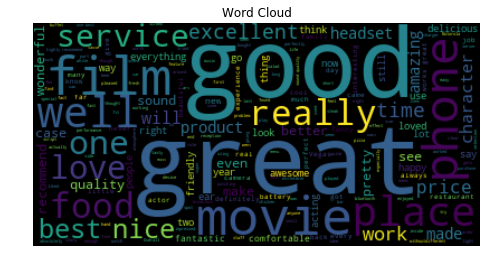

In [58]:
from wordcloud import WordCloud
cloud = WordCloud().generate(' '.join(my_df.sentences[my_df.scores==1].values.tolist()))
plt.figure(figsize=(8,6))

plt.imshow(cloud, interpolation = 'bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()

#### TF-IDF

In [59]:
# TF-IDF
# Convert a collection of raw documents to a matrix of TF-IDF features.
my_vectorizer = TfidfVectorizer(analyzer='word')
my_tf_idf = my_vectorizer.fit_transform(my_df.sentences)
my_idf = my_vectorizer.idf_

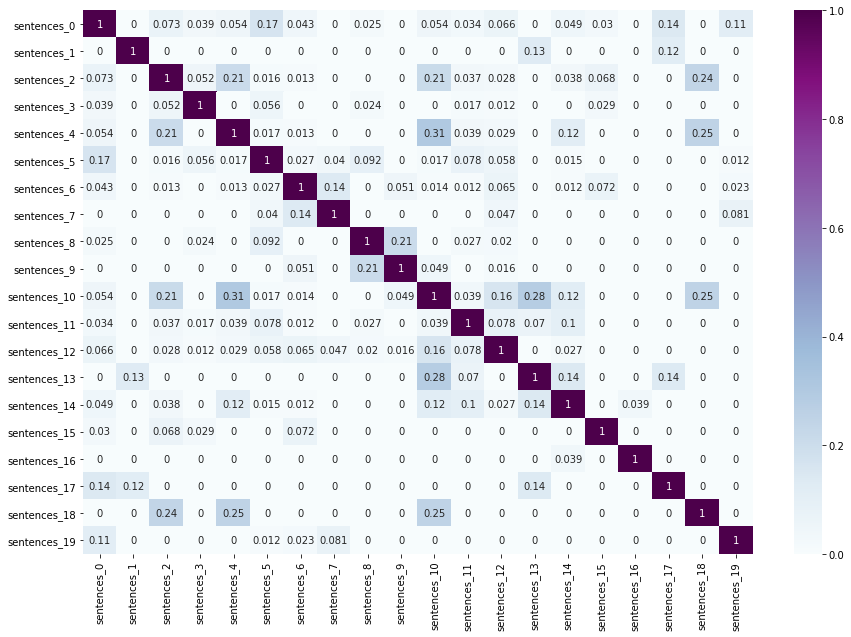

In [60]:
# Cosine Similarity of sentences
similarity = cosine_similarity(my_tf_idf)

# plot
plot_x = ["sentences_" + str(i) for i in range(20)]
plot_y = ["sentences_" + str(i) for i in range(20)]
plot_z = similarity[0:20, 0:20]

pics = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 10))
ax4 = sns.heatmap(pics,cmap="BuPu",vmin=0, vmax=1, annot=True)

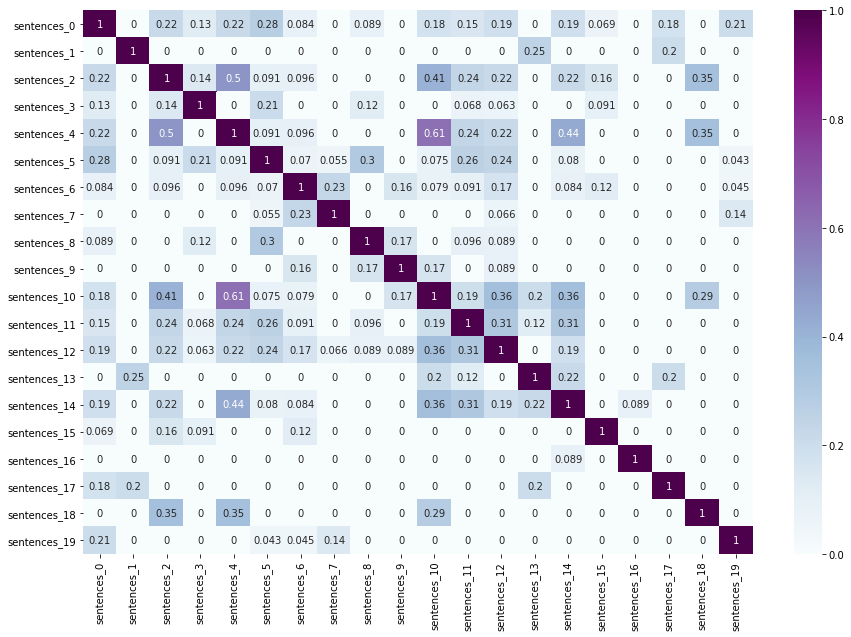

In [61]:
# Compute cosine similarity of counting
similarity_counts = cosine_similarity(df_counts)

# plot
plot_x = ["sentences_"+ str(i) for i in range(20)]
plot_y = ["sentences_"+ str(i) for i in range(20)]
plot_z = similarity_counts[0:20, 0:20]

pics = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 10))
ax = sns.heatmap(pics,cmap="BuPu",vmin=0, vmax=1, annot=True)

#### Naive Bayes classifier - TF-IDF features

In [62]:
# words frequency
X = my_tf_idf.toarray()
Y = my_df.scores.values

# Split arrays or matrices into random train and test subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

# Naive Bayes classifier for multinomial models
clf = MultinomialNB()
# Fit Naive Bayes classifier according to X_train, Y_train
clf.fit(X_train, Y_train)

# Returns the mean accuracy on the given test data and labels.

#predicted = clf.predict(X_test)
#rates = accuracy_score(Y_test, predicted)

# Evaluate a score by cross-validation
rates = cross_val_score(clf, X, Y, scoring = 'accuracy', cv = 20).mean()
print('TF-IDF: ' + str(rates))


TF-IDF: 0.8275484431404354


#### Naive Bayes classifier - word frequency features

In [63]:
# words frequency
X = df_counts.toarray()
Y = my_df.scores.values

# Split arrays or matrices into random train and test subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

# Naive Bayes classifier for multinomial models
clf = MultinomialNB()
# Fit Naive Bayes classifier according to X_train, Y_train
clf.fit(X_train, Y_train)
# Returns the mean accuracy on the given test data and labels.

#predicted = clf.predict(X_test)
#rates = accuracy_score(Y_test, predicted)

# Evaluate a score by cross-validation
rates = cross_val_score(clf, X, Y, scoring = 'accuracy', cv = 20).mean()

print('Word Frequency: ' + str(rates))

Word Frequency: 0.8129120549274049


In [64]:
# Differences:
# By checking accuracy, I think thatTF-IDF acts almost the same as 
# naive bayes Word Frequency.

### Part 4

### Answer here
I think counting values only by value_counts() and printing out bar charts is not such efficient in these datasets. Because bar charts can only view numerical-distribution of diffenent kinds of datas. In constract, heatmap can give more statical information, giving some better effort on our analysis.